## Practical 3:

The objectives of this practical are to learn:

- Using Pandas to process a data set for an ML algorithm
- How to carry out various types of analysis given a dataset in order to understand the characteristics of the dataset
- How to use other Python libraries, e.g. seaborn, for the analysis
- How to prepare and transform a dataset to make it ready for an ML algorithm
- How to train and test an ML model
- How to evaluate the performance of a trained ML model

We will first run through an example in Tutorial 1. We'll then be given another dataset for us to complete the whole workflow of logistic regression in Exercise 1.

## Tutorial 1: Implementing logistic regression through a machine learning workflow

In this tutorial, we will go through the whole workflow of a logistic regression task. This is a typical workflow that we can use for many other machine learning tasks.

Some useful information about formatting texts in markdowns, which we can refer to when working on a Jupyter Notebook, for example, for an assignment or a group project:

https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/



### Using pandas to process a data set for an ML model

In this tutorial, we will Pandas. For quick reference, following the link:

https://pandas.pydata.org

It is often the case in many application problems the datasets are generated or given in the csv format. Before a dataset can be used by a logistic regression algorithm and indeed by many other *ML algorithms*, they would need to be preprocessed and converted into NumPy arrays. This kind of data processing and conversion can be easily done using Pandas. Once a dataset is represented as a DataFrame in Pandas, the data can be processed in many different ways.

We will llustrate how to use pandas for data cleaning and preparation before we can use a logistic regression model for classification.

We also need to use another library, seaborn, which is useful for generating and plotting statistics about a dataset.

https://seaborn.pydata.org

In [80]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns #for statistics ploting
import matplotlib.pyplot as plt
import math
import sklearn
%matplotlib inline

## Data preparation

### Creating and viewing a data object/dataframe

In this example, the dataset is a csv file, titanic.csv, which contains a two-dimensional table with rows representing passengers on the Titanic and named columns representing various types of information about each passenger. The dataset is read into a dataframe using the read_csv method in Pandas.

A dataframe contains two-dimensional, size-mutable, potentially heterogeneous tabular data. Once a dataframe is created, a number of methods can be used, e.g. head(10), tail(10), index, etc. to have a quick view of it.

In [81]:
titanic_data = pd.read_csv('titanic.csv') # Read a csv file into DataFrame, depending on where the file is
titanic_data.head(5) # view first 5 rows of the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SibSp = (number of siblings on board) / (number of spouse on board)

ParCh = (number of Parents on board) / (number of Children on board)

In [82]:
titanic_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
titanic_data.index # index of the dataframe

RangeIndex(start=0, stop=891, step=1)

In [84]:
print("Number of passengers: " + str(len(titanic_data.index))) # concatecate two strings

#print("Number of passengers:", len(titanic_data.index)) # use two parameters instead

Number of passengers: 891


### Analysing data 

We now use seaborn to create different plots to show the relationships between variables.

Use the countplot() method to show the distribution of values in a column. For example, we can show the distribution in the column named as "Survived".

<AxesSubplot: xlabel='Survived', ylabel='count'>

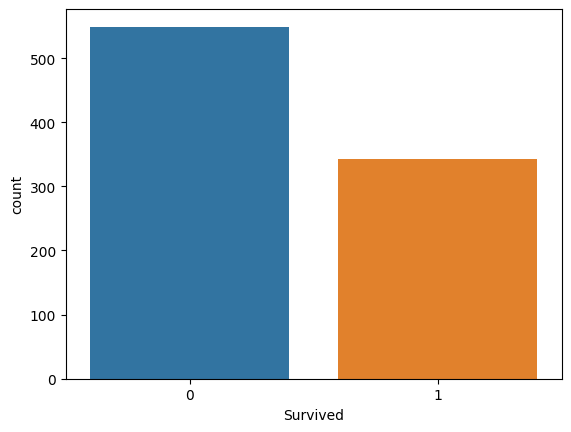

In [85]:
# Use seaborn for statistical analysis

sns.countplot(x="Survived", data=titanic_data)

# uncomment to show another feature 
# sns.countplot(x="Pclass", data=titanic_data)

We can use anohter parameter, hue, to take another varaible with its distribution colour-coded to be shown within each type of values in x.

<AxesSubplot: xlabel='Survived', ylabel='count'>

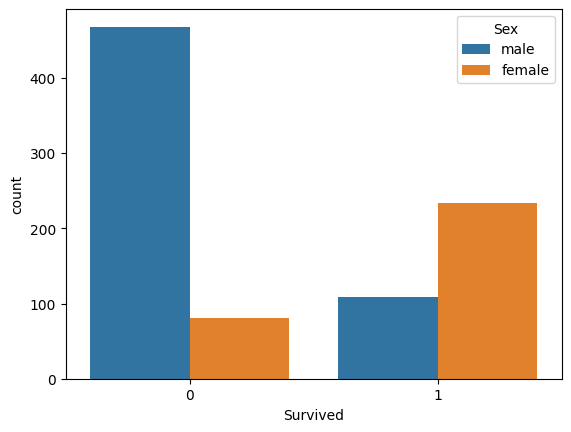

In [86]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data) 

<AxesSubplot: xlabel='Survived', ylabel='count'>

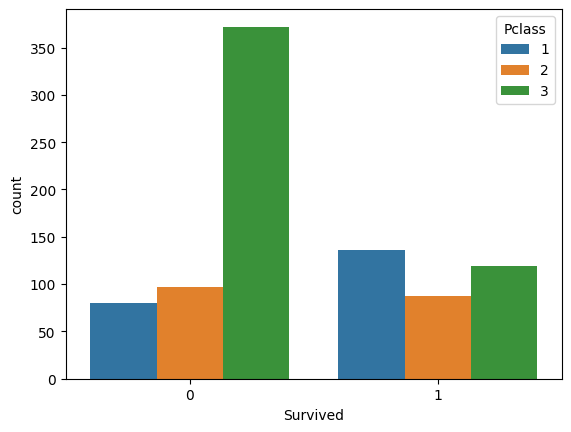

In [87]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

Plot a histogram to show the value distribution of a variable 

<AxesSubplot: ylabel='Frequency'>

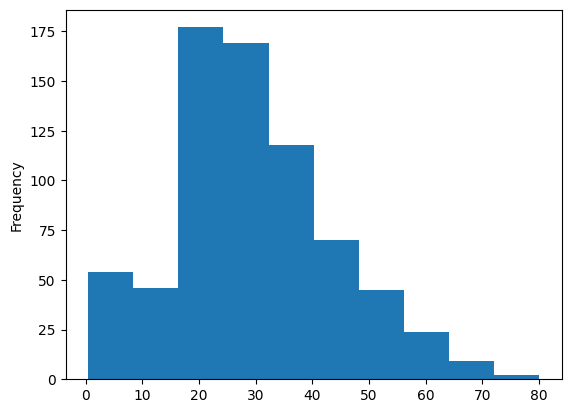

In [88]:
titanic_data["Age"].plot.hist()

As we can see, a histogram shows range-based frequency counts.

<AxesSubplot: ylabel='Frequency'>

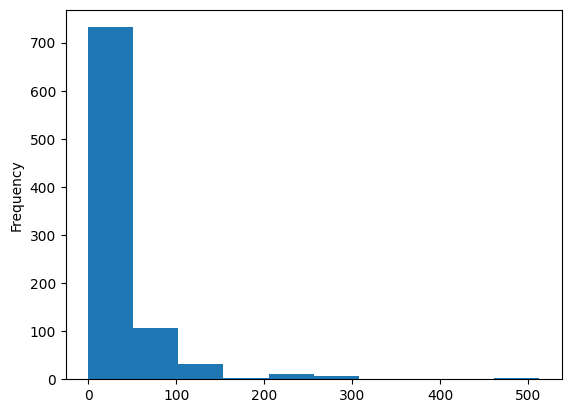

In [89]:
titanic_data["Fare"].plot.hist()

We can change the intervals of fares and the size of the figure, rather than using the default ones.

<AxesSubplot: ylabel='Frequency'>

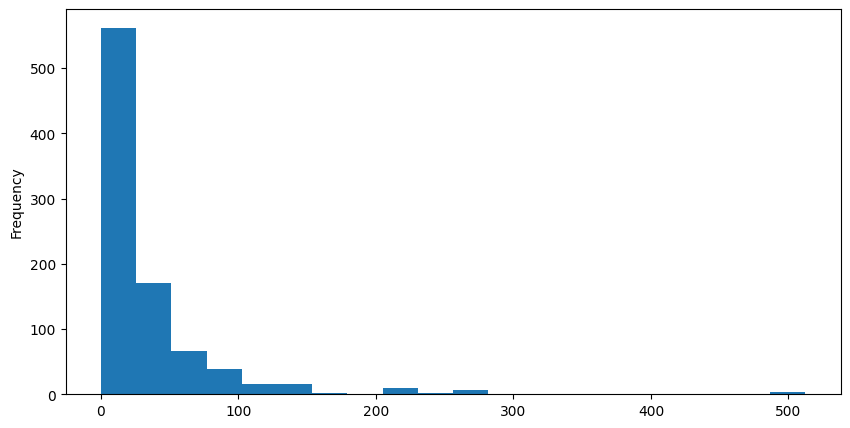

In [90]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

Show information about the dataset, e.g. number of non-null values etc.

In [91]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocessing data

For further information about preprocessing data, refer to:

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

### Data cleaning/data wrangling

Dealing with null values and redundant features

### Dealing with null values

Check whether each variable on each row has a null value - False means no while True means yes.

In [92]:
titanic_data.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


As we can see there are a lot of null values in the "Age" and "Cabin" columns.

Show the numbers of null values per column, e.g there are 177 in the Age column

In [93]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can use a heatmap to visualise the null values.

<AxesSubplot: >

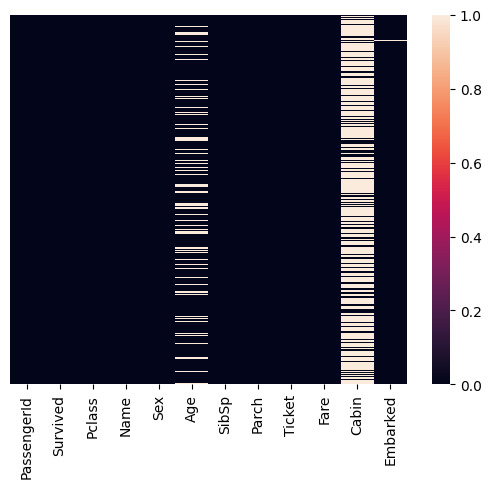

In [94]:
sns.heatmap(titanic_data.isnull(), yticklabels=False)

As we can see, the heatmap clearly shows that there are a lot of null values in the "Age" and "Cabin" columns.

**Null values in a colum can be replaced with dummy values or such a column can be removed altogether.**

In [95]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's drop the Cabin column as it contains a lot of null values.

In [96]:
titanic_data.drop("Cabin", axis=1, inplace=True)

Check whether the column has been dropped

In [97]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can also drop those rows with null values if we don't want to drop a column

In [98]:
titanic_data.dropna(inplace=True)

<AxesSubplot: >

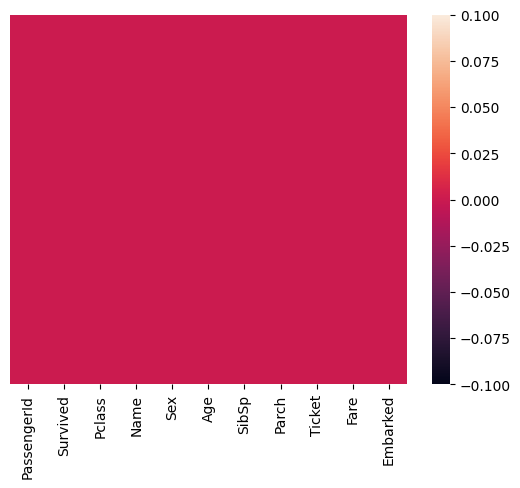

In [99]:
sns.heatmap(titanic_data.isnull(), yticklabels=False)

<AxesSubplot: >

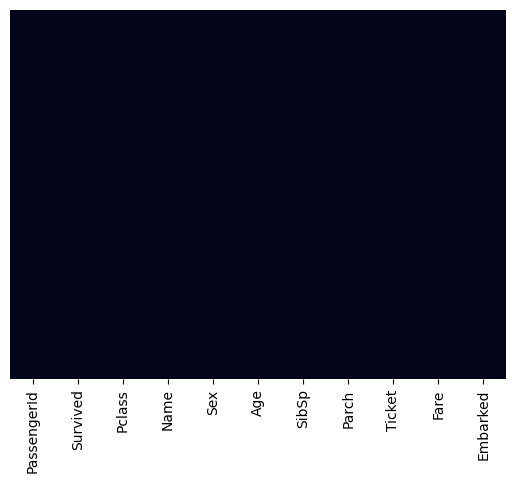

In [100]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

Check the number of rows left after those rows with any null value have been dropped

In [101]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [102]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We can see now there is no null value. We can actually deal with null values in many different ways, depending on the dataset we are cleaning, e.g. replacing a null value with an estimated value, a mean or average value etc. *The bottom line of data cleaning is to improve its quality, making it best suited for the machine learning task.*

### Converting categorical values into numerical values

In [103]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Column Sex has categorical values, male and female. We can see whether we can represent the same data with numerical values. We can use the dummies() method to create a new column for each of the categorical values for a feature with the value as the column name. These dummy features are also called one-hot encodings. Refer to the example in the lecture slides.

In [104]:
pd.get_dummies(titanic_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


We don't really need two dummy columns, male or female, as they are exclucsive to each other. So we can drop one of them.

In [105]:
sex=pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


We need to similarly deal with column Embarked.  

In [106]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [107]:
embarked=pd.get_dummies(titanic_data["Embarked"])
embarked.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Embarked represents where the traveller mounted from. There are three possible values for Embarked — Southampton, Cherbourg, and Queenstown. Again we can drop one of the three columns as the other two columns will decide on the dropped column.

In [108]:
embarked=pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


We can do similarly with Pclass

In [109]:
pcls=pd.get_dummies(titanic_data["Pclass"], drop_first=True)
pcls.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


We can now add all the remaining dummy columns to the dataset

In [110]:
titanic_data=pd.concat([titanic_data,sex,embarked,pcls],axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


We next drop those columns that have been replaced with their dummy columns and any other columns not needed (e.g. 'Name', 'Ticket').

In [111]:
titanic_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


We finnally have a dataset with numerial columns only which is ready to be used for logistic regression.

## Traning and testing the model

### Creating the training dataset

In this case, we split the titanic_data into two ndarrays, one for the feature matrix and another for the corresponding classifications.

In [112]:
X=titanic_data.drop(['Survived'],axis=1)
y=titanic_data['Survived']

X[0:1]

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.25,1,0,1,0,1


In [113]:
y[0:1]

/var/folders/06/j91gzngd1x3bqw957vbsz_w80000gn/T/ipykernel_1196/4259518875.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y[0:1]


0    0
Name: Survived, dtype: int64

### Spliting the dataset into the training and testing datasets.

We use the train_test_split() method to do the split. Note the ratio between the two datasets and the random state of the split. For further information about the method, refer to:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [115]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

### Scaling the dataset

Sometimes it is necessary to scale the original dataset as some of its features are in much different scales which may affect the model. This is actually a step in data preprocessing but we haven't done it until now.

We can create a pipeline which consists of two steps, scaling and logistic regression model. We can then use the pipeline instead of the logistic model alone in training and prediction.

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

For further information about standardisation in sklearn, refer to:

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

Also refer to the lecture slides about scaling features by stansardisation.

### Create a pipeline to include the standard scaler as part of the model 

In [117]:
pipe = make_pipeline(StandardScaler(), logmodel)
pipe.fit(X_train, y_train)  # apply the pipeline on training data

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
pipe.score(X_test, y_test) # apply the pipeline on the testing data

In [ ]:
y_pred=pipe.predict(X_test) #make predictions on the testing data

## Performace evaluation

A number of methods imported from sklearn.metrics class can be used for calculating various performance measures.

### Generate a confusion matrix

We can also use the confusion_matrix method to calculate the confusion matrix, which takes two parameters, a ground truth column and a predicted result column, as input, produces a confusion matrix. Based on a confusion matrix, the precision, recall, f1-score, support and accuracy etc. can be calculated.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

As we can see that the above confusion matrix is a 2D ndarray, in which $C_{0,0}=102$ is the count of true negatives (TN), $C_{0,1}=24$ is the count of false positives (FP), $C_{1,0}=24$ is the count of false negatives (FN) and $C_{1,1}=64$ is the count of true positives (TP).

### Generate a classification/performance report

The classification_report() takes two parameters, a ground truth column and a predicted result column, as input, and produces an analysis report of performance evaluation. For more information, refer to:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

As we can see in the report, a number of performance metrics have been calculated and shown in the table, though we understand that these have been calculated from the confusion matrix.

**Note that the precision, recall, f1-score and support is listed for each of the two classes, i.e. 0 and 1. Can you calculate them from the confusion matrix above?**

We can use the accuracy_score() method from the metrics class to calculate the accuracy:

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

**Can you calculate the accuracy above from the confusion matrix above?**

## K-fold Cross Validation

We can import the cross_val_scores method from the sklearn.model_selection class for k-fold cross validation. For further information:

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Let's run throiiugh an example of 10-fold cross validation. In each iteration of validation, a model is trained on a traing dataset (9 folds of the dataset) and validated on the testing dataset (the remaining 1 fold of the dataset). The method returns various types of accuracy scores.

In [ ]:
from sklearn.model_selection import cross_val_score

# do cross validation on the training data
scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = 10)

# print the scores across 10 folds
print('Accuracies: ', scores)

# print the average score
print('Average accuracy: ', np.mean(scores))

# do cross validation on the test data
scores_test = cross_val_score(pipe, X_test, y_test, scoring = 'accuracy', cv = 10)

print('Test accuracies: ', scores_test)

print('Test average accuracy: ', np.mean(scores_test))


The scores can also be calculated for many other metrics listed:

https://scikit-learn.org/stable/modules/model_evaluation.html

Fpr example, we can calculate precision:

In [ ]:
from sklearn.model_selection import cross_val_score

# do cross validation on the training data
scores = cross_val_score(pipe, X_train, y_train, scoring = 'precision', cv = 10)

# print the scores across 10 folds
print('Precisions: ', scores)

# print the average score
print('Average precison: ', np.mean(scores))

# do cross validation on the test data
scores_test = cross_val_score(pipe, X_test, y_test, scoring = 'precision', cv = 10)

print('Test precisions: ', scores_test)

print('Test average precision: ', np.mean(scores_test))


## Exercise 1: Predicting SUV purchases

In this exercise, we'll use another dataset given in a csv file for SUV purchases. We'll analyse and prepare the dataset, train and test a logistic regression model and evaluate the performance of the model in a similar way to what we have done with the titanic dataset.

The Gender column can be converted into a dummy column.

The dataset also need to be scaled before the training and testing.

In [ ]:
suv_data=pd.read_csv("./datasets/suv_data.csv")

In [ ]:
suv_data.head(5)